Performing classification on MNIST Handwritten Digit dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-06-11 20:21:18.089050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In this project, we are going to use the MNIST dataset to classify the images of handwritten digits to their corresponding numbers (0 to 9). We have 60,000 images to train and 10,000 images to test.

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [3]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
tr_y = train_y

In [5]:
ts_y = test_y

In [6]:
train_X.shape, test_X.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
train_y.shape, test_y.shape

((60000,), (10000,))

In [8]:
figures = np.unique(train_y)
figures

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

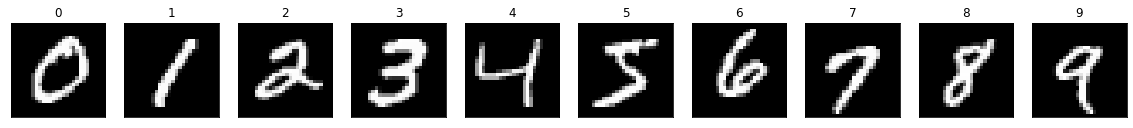

In [9]:
# Display the images

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 8))
for i in range(10):
    axes[i].set_title(figures[i])
    sample = train_X[train_y == i][0]
    axes[i].imshow(sample, cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()




In [10]:
# one hot encoding the training set


train_y= tf.keras.utils.to_categorical(train_y, 10)


test_y = tf.keras.utils.to_categorical(test_y, 10)



In [11]:
for i in range(10):
    print(train_y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

In [12]:
# normalizing the data

train_X = train_X / 255.0
test_X = test_X / 255.0

In [13]:
# reshaping the data:

train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
print(train_X.shape)

(60000, 784)


Performing CNN, SVM, and Random forests for the given dataset.

### Convolutional Neural Network

We took CNN because it works well on Computer vision tasks like image classification, image
recognition, etc. Also, SVM is another good classifier that takes different kernel parameters to classify
the images, it can compute high-dimensional datasets effectively. Random forests consist of Decision
trees and provide robustness to handle complex datasets like handwritten recognition.

In [14]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

CNN:
Convolutional neural networks are the popular visual imagery classification techniques. It reduces the
image form which can be processed easily and keeps the information of features. We find neurons in
Images from the dataset( 0 to 9)
Implementing dataset using tensorflow
this algorithm which are obtained by the weighted sum of multiple inputs and outputs an activation
value. When we give an image into CNN it generates several activation functions at each layer that are
passed to the next layer.

Implementing the algorithm:
We have two dense layers that have 28 hidden units. The output layer consists of 10 units as we have
10 image outputs. We have used the dropout layer to prevent overfitting. We used 10 epochs with a
batch size of 512. We have chosen to implement the algorithm using several activation functions. We
have ReLU, Tanh, Softmax, and Sigmoid.
ReLU: ReLU is used primarily in the hidden layers of neural networks due to its efficient gradient
propagation and sparsity.
Softmax is ideal for the output layer of a classification network, where the results can be interpreted as
probabilities.
Sigmoid can be used for binary classification in the output layer or to model probabilities of binary
events occurring in hidden layers.
Tanh is often used in hidden layers of a neural network because of its zero-centered nature, which can
lead to better convergence in some cases.

MODEL WITH relu ACTIVATION FUNCTION



/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)


Performing CNN with 10 epochs and batch size 512 for relu function

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6913 - loss: 1.0470
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9297 - loss: 0.2407
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9500 - loss: 0.1717
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9608 - loss: 0.1340
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9685 - loss: 0.1098
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9716 - loss: 0.0955
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9764 - loss: 0.0787
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0740
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9806 - loss: 0.0646
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9833 - loss: 0.0541

Evaluating using test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)


Performing CNN with 10 epochs and batch size 512 for softmax function

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1083 - loss: 2.3011
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1174 - loss: 2.2800
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4063 - loss: 2.2205
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7792 - loss: 2.1100
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8215 - loss: 1.9535
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8298 - loss: 1.7690
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8319 - loss: 1.5766
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8358 - loss: 1.3938
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8359 - loss: 1.2313
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8386 - loss: 1.0922

Evaluating using test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)


Performing CNN with 10 epochs and batch size 512 for tanh function

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7304 - loss: 0.9031
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9194 - loss: 0.2761
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9370 - loss: 0.2124
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9504 - loss: 0.1710
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9591 - loss: 0.1407
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9643 - loss: 0.1207
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9705 - loss: 0.1019
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9733 - loss: 0.0899
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9759 - loss: 0.0790
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9799 - loss: 0.0658

Evaluating using test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)


Performing CNN with 10 epochs and batch size 512 for sigmoid function

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3720 - loss: 1.8930
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8508 - loss: 0.5783
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8982 - loss: 0.3668
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9138 - loss: 0.3059
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9229 - loss: 0.2672
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9309 - loss: 0.2360
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9386 - loss: 0.2127
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9433 - loss: 0.1953
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9492 - loss: 0.1771
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9532 - loss: 0.1629

Evaluating using test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms

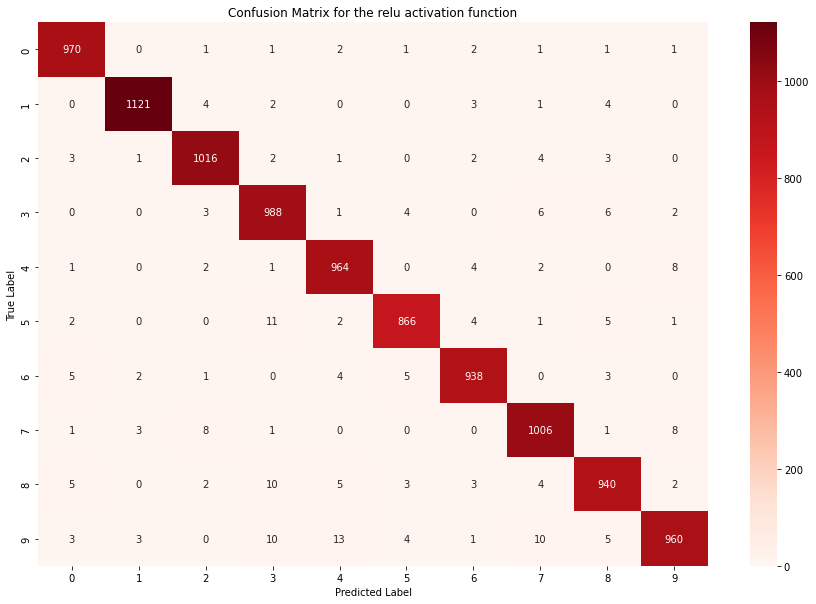

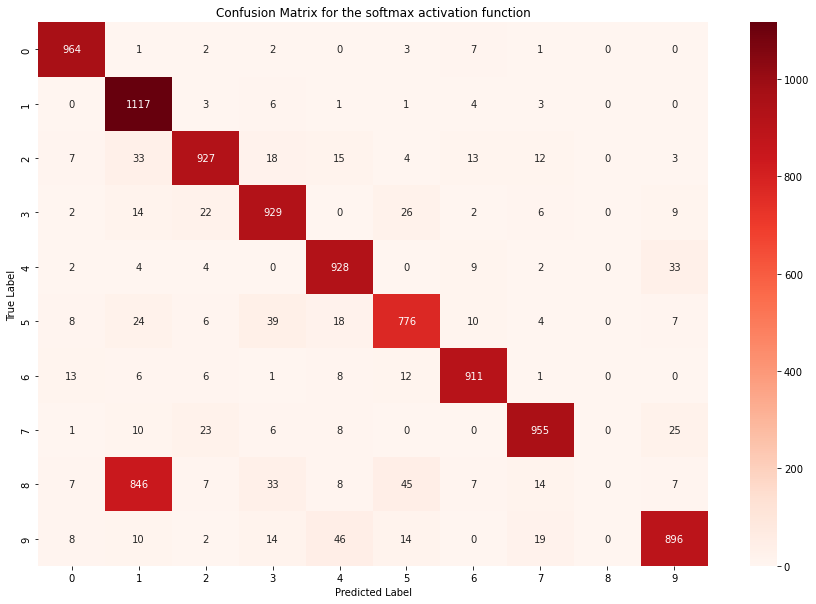

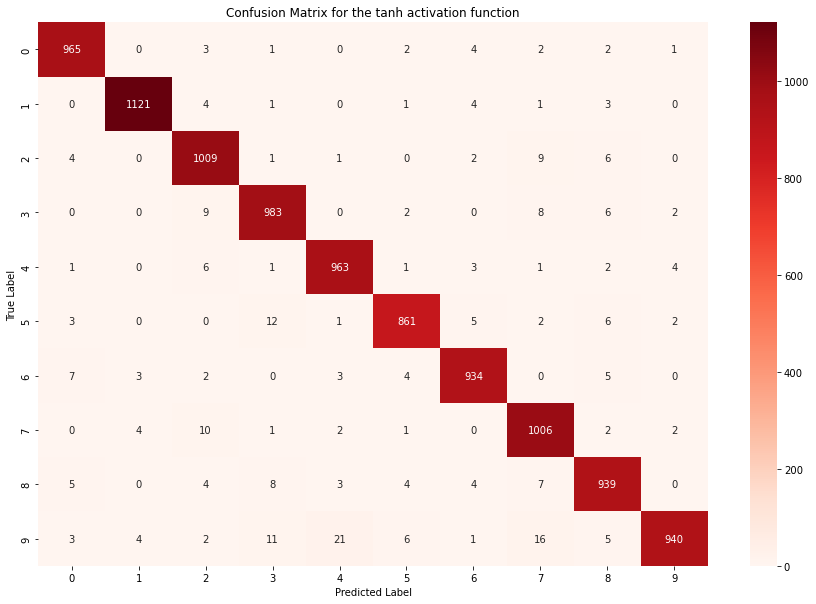

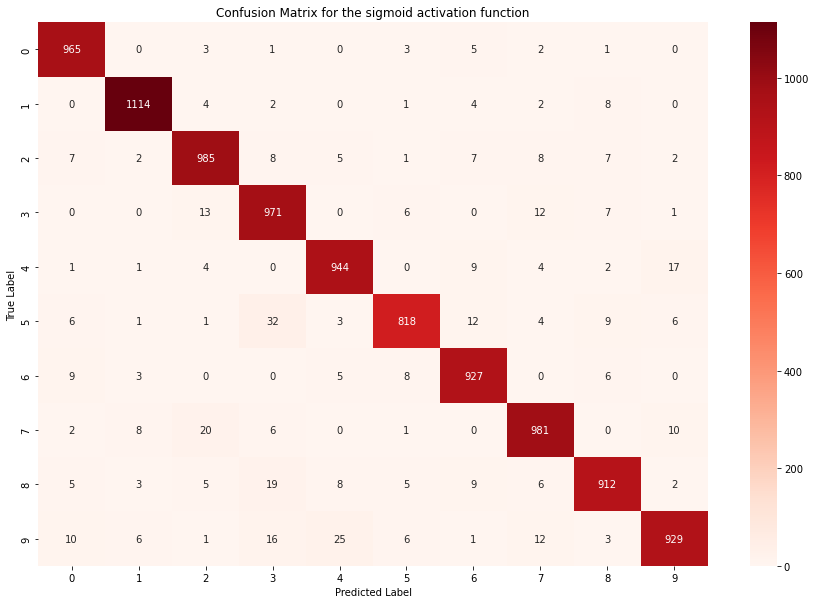

In [15]:
# Convolutional Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random


activ_functions = ['relu', 'softmax', 'tanh', 'sigmoid']


for i in activ_functions:
    
    print(f"MODEL WITH {i} ACTIVATION FUNCTION\n")

    model = Sequential()
    model.add(Dense(units=128, input_shape=(784,), activation = i))
    model.add(Dense(units=128, activation = i ))
    model.add(Dropout(0.25))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    print()
    
    print(f'Performing CNN with 10 epochs and batch size 512 for {i} function\n')
    epochs= 10
    model.fit(x= train_X, y= train_y , batch_size= 512, epochs=epochs)
    print()
    
    # we now evaluate our model using test set
    print("Evaluating using test dataset\n")
    testing_loss, testing_accuracy = model.evaluate(test_X, test_y)
    print(testing_loss, testing_accuracy)
    
    # predicting using the test data
    print("Predicting the labels using the test data\n")
    pred = model.predict(test_X)
    labels = np.argmax(pred, axis = 1)
    print()

    print("Predicted values: ", pred)
    print("Labels of predicted values: ", labels)
    
    print()
    
    # Evaluating the performance using confusion matrix:
    matrix = confusion_matrix(ts_y, labels)

    # Plot
    fig, axes = plt.subplots(figsize = (15,10))
    axes = sns.heatmap(matrix, annot = True, fmt = 'd', ax = axes, cmap = "Reds")
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(f'Confusion Matrix for the {i} activation function');
    
    

    


Computing using the ReLU activation function:
The model’s accuracy started at 68.95% at epoch 1 and improved steadily to 98.43% at epoch 10. And
we see our loss decreasing from 1.0715 to 0.0525.

Computing using the softmax activation function:
The model’s accuracy started at 10.67% at epoch 1 and improved steadily to 84.83% at epoch 10. And we see our loss decreasing from 2.3011 to 1.0732.

Computing using the Tanh activation function:
The model’s accuracy started at 74.17% at epoch 1 and improved steadily to 97.79% at epoch 10. And we see our loss decreasing from 0.8865 to 0.0710. For the testing data, we see the accuracy to be 97.35%.

Computing using the sigmoid activation function:
The model’s accuracy started at 34.84% at epoch 1 and improved steadily to 95.07% at epoch 10. And we see our loss decreasing from 1.9514 to 0.1661. For the testing data, we see the accuracy to be 94.96%.

Let us visualize the performance of the models using confusion. matrix:
For the ReLU activation function:
The model correctly predicted the image 0 for 973 times and 1 for 1123 times. But, there are 3 instances where the actual class was '0' but the model predicted '2', and 6 instances where the actual class was '9' but the model predicted ‘6'. We see some classes have a very high number of correct predictions, such as '1', '7', and '6', indicating that the model is quite good at identifying these digits. The digits that have the most misclassifications appear to be '5' and '8'. For '5', there are noticeable confusions with '3' and '8', and for '8', there are confusions with '1', '3', and ‘9'. Based on the misclassifications, efforts to improve the model could focus on distinguishing '5' from '3' and '8', as well as reducing the confusion between '8' and several other digits.

For the softmax activation function:
The model correctly predicted the image 0 for 964 times,1 for 1112 times, and so on. Some classes are predicted with high accuracy, such as '1', '4', and ‘7’. Other classes have higher confusion, for example, '5' has been frequently misclassified as '3' and '8', and '8' has been misclassified as '9' and '5'. This suggests that the model struggles to distinguish these classes. More training examples or data augmentation techniques that focus on the nuances between '5' and '3' might improve classification accuracy for those digits.

For tanh function:
The diagonal from top-left to bottom-right shows the correct predictions for each class. For instance, there were 968 correct predictions for class 0, 1122 for class 1, 1012 for class 2, and so on. Class 0 was misclassified as class 4 two times, and class 5 was misclassified as class 3 six times. Other classes have more misclassifications, which could be a focus for improvement. For example, class 5 has 19 instances misclassified as class 4, and class 8 has significant confusion with several other classes (like 9 instances misclassified as class 2 and 8 as class 3). Improving feature extraction for classes 5 and 8 could help reduce the number of misclassifications.

For sigmoid activation function: 
The model correctly predicted the class '0' as '0' for 966 instances, '1' as '1' for 1118 instances, and so on. The class '5' was misclassified as '3' for 19 instances, and class '7' was misclassified as '1' for 13 instances. There seem to be a significant number of instances where class '5' is mistaken for class '3' and class '8' is confused with class '3' and ‘9'. Some classes (like '3', '5', and '8') show more confusion, indicating areas for improvement.

In [16]:
# using cross validation 

#from sklearn.model_selection import cross_val_score
#cross_val_score(clf, train_X, train_y, cv = 3, scpring = "accuracy")

Random forest algorithm:
We have chosen to take two impurity factors, one is Gini and the other is Entropy. The Random Forest algorithm is an ensemble learning method for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees' habit of overfitting to their training set.


### Random Forest classifier

In [17]:
# implementing Random forest:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training on the existing dataset
rand_clf = RandomForestClassifier(criterion = 'gini', random_state=42)
rand_clf.fit(train_X, train_y)

# Evaluating the model
pred_r = rand_clf.predict(test_X)

score = accuracy_score(test_y, pred_r)
print("Accuracy with testing dataset", score)

Accuracy with testing dataset 0.9035


In [18]:
# Training on the existing dataset
rf_clf_1 = RandomForestClassifier(criterion = 'entropy', random_state=42)
rf_clf_1.fit(train_X, train_y)

# Evaluating the model
pred_r_1 = rf_clf_1.predict(test_X)

score_1 = accuracy_score(test_y, pred_r)
print("Accuracy with testing dataset", score_1)

Accuracy with testing dataset 0.9035


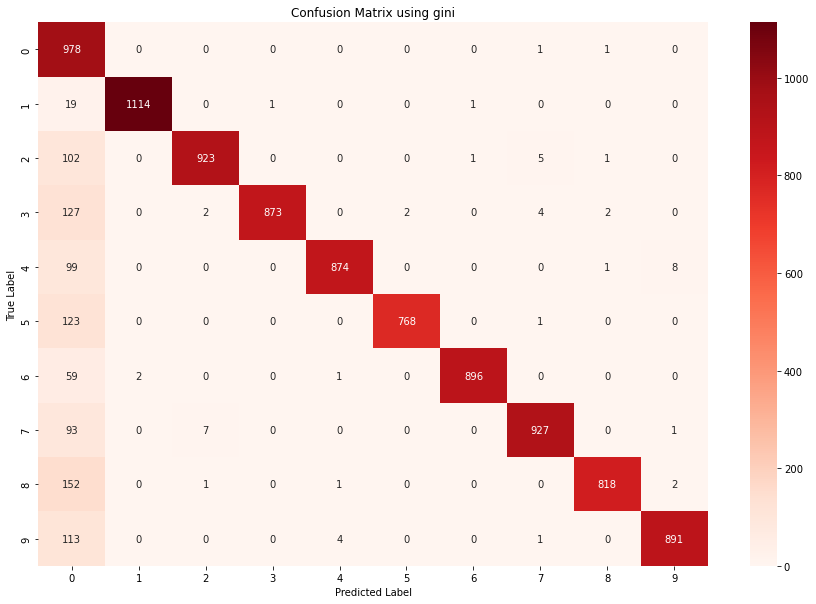

In [19]:
labels_gini = np.argmax(pred_r, axis = 1)
RF_1 = confusion_matrix(ts_y, labels_gini)

# Plot
fig_rf_1, axes_rf_1 = plt.subplots(figsize = (15,10))
axes_rf_1 = sns.heatmap(RF_1, annot = True, fmt = 'd', ax = axes_rf_1, cmap = "Reds")
axes_rf_1.set_xlabel('Predicted Label')
axes_rf_1.set_ylabel('True Label')
axes_rf_1.set_title('Confusion Matrix using gini');

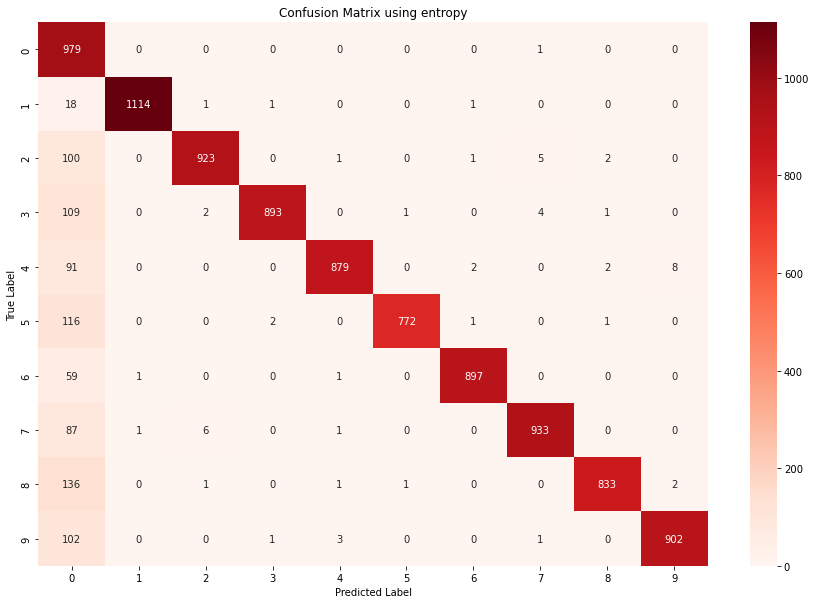

In [20]:
labels_entropy = np.argmax(pred_r_1, axis = 1)

RF_2 = confusion_matrix(ts_y, labels_entropy)

# Plot
fig_rf_2, axes_rf_2 = plt.subplots(figsize = (15,10))
axes_rf_2 = sns.heatmap(RF_2, annot = True, fmt = 'd', ax = axes_rf_2, cmap = "Reds")
axes_rf_2.set_xlabel('Predicted Label')
axes_rf_2.set_ylabel('True Label')
axes_rf_2.set_title('Confusion Matrix using entropy');

The model using the "gini" criterion achieved an accuracy of 90.35% on the test dataset. The model using the "entropy" criterion achieved a slightly higher accuracy of 90.98% on the test dataset. With the lowest accuracy rates, we wish to not consider this algorithm.

### Support Vector Machines

SVM ( Support Vector Machines)
We have implemented SVM using different kernels. We took Linear, Radial basis, Polynoial, and Sigmoid kernels.

In [21]:
# implementing SVM 

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
train_X.shape

(60000, 784)

In [23]:
tr_y.shape

(60000,)

Accuracy using linear kernel: 0.9404
Accuracy using rbf kernel: 0.9792
Accuracy using poly kernel: 0.9771
Accuracy using sigmoid kernel: 0.7759


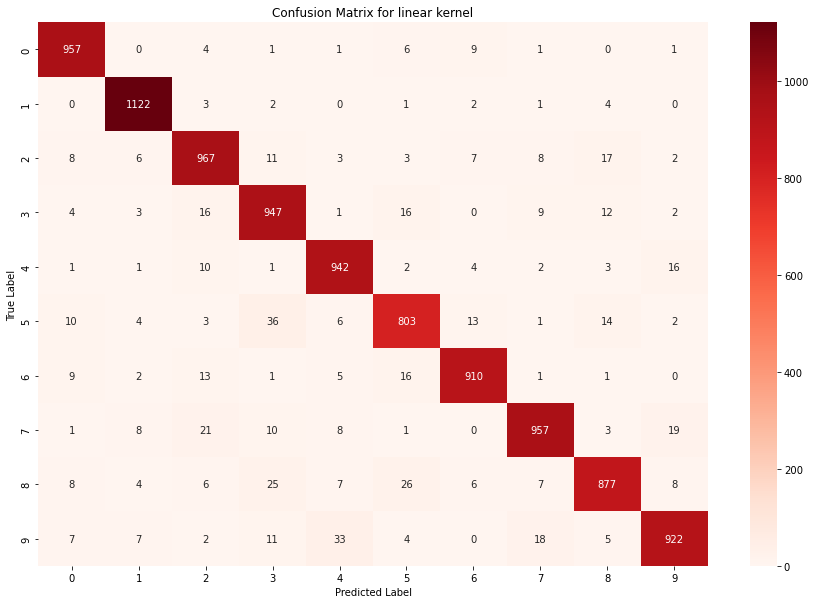

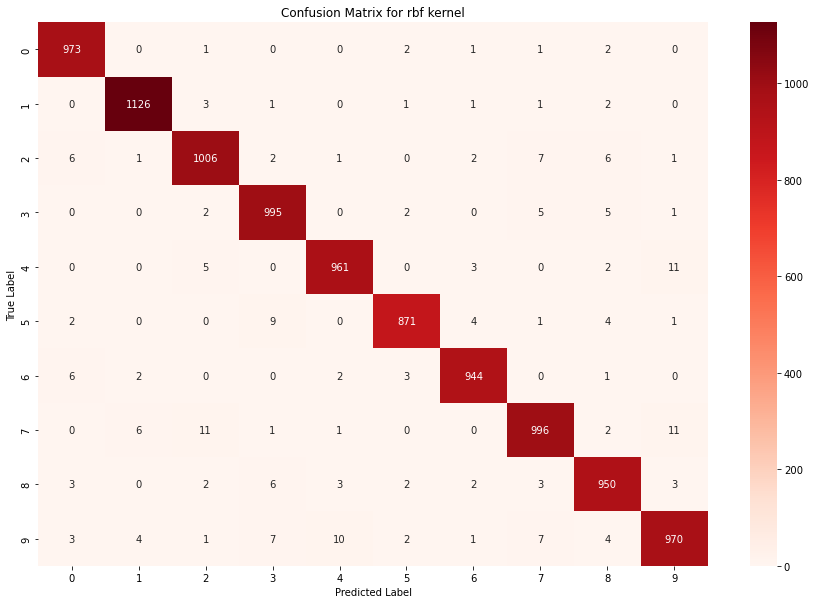

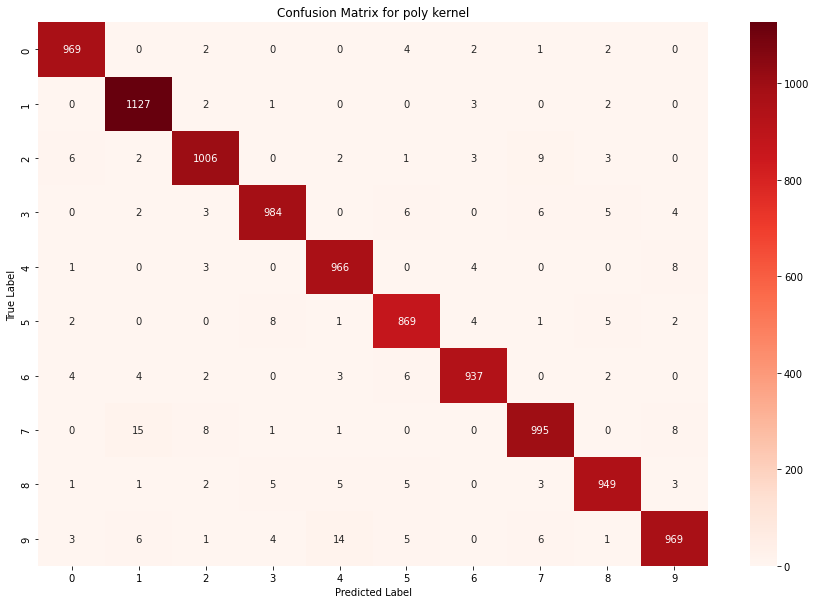

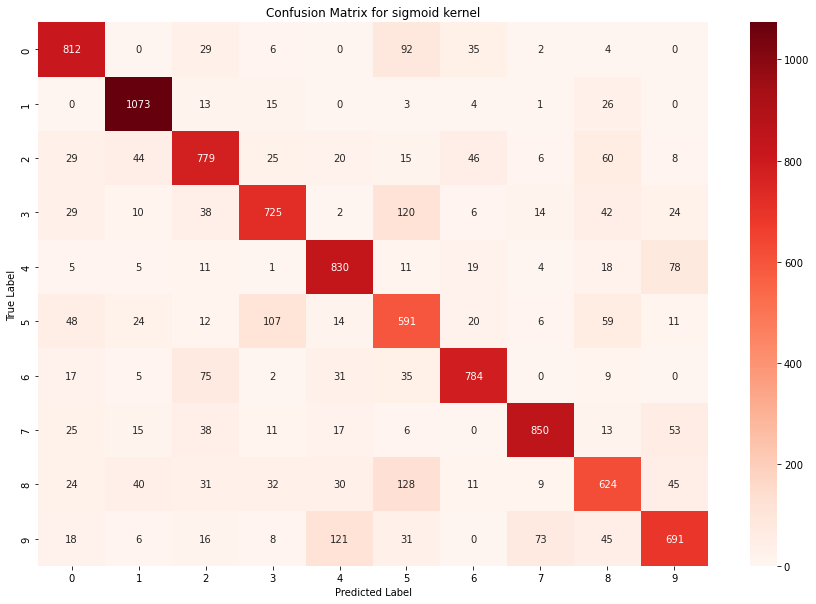

In [24]:
# using linear Kernel

kernels  = ['linear', 'rbf','poly','sigmoid']

for i in kernels:
    svm_model = SVC(kernel= i )
    svm_model.fit(train_X, tr_y)

    # predicting with test data
    pred_svm = svm_model.predict(test_X)
    accuracy_svm = accuracy_score(ts_y, pred_svm)

    print(f"Accuracy using {i} kernel: {accuracy_svm}")


    svm_matrix = confusion_matrix(ts_y, pred_svm)

    # Plot
    fig_1, axes_1 = plt.subplots(figsize=(15,10))
    axes_1 = sns.heatmap(svm_matrix, annot=True, fmt = 'd', ax = axes_1, cmap = "Reds")
    axes_1.set_xlabel('Predicted Label')
    axes_1.set_ylabel('True Label')
    axes_1.set_title(f'Confusion Matrix for {i} kernel');

The linear kernel achieved an accuracy of approximately 94.04%.
The RBF kernel achieved an accuracy of approximately 97.92%.
The polynomial kernel's accuracy is 97.71%
The sigmoid kernel achieved an accuracy of approximately 77.59%.
For the linear kernel, the confusion matrix shows relatively few misclassifications across most classes, indicating strong performance but with some confusion particularly between classes 5 and 3, and 8 and 3. The RBF kernel confusion matrix indicates an even stronger performance with higher true positives along the diagonal and fewer misclassifications overall. The polynomial kernel likely exhibits performance in line with the RBF kernel since the accuracy of SVM tends to improve with more complex models for datasets like MNIST. The sigmoid kernel confusion matrix displays more misclassifications, particularly for classes that share similarities such as 5, 3, or 8 and The darker cells across the matrix indicate a higher number of misclassifications compared to other kernels.

In [26]:
# implementing K-fold Cross validation to improve my model
# i have used relu as i got higher accuracy for relu activation function.
from sklearn.model_selection import KFold

k = 5

cross = KFold(n_splits=k, shuffle=True)

scores = []

for i, j in cross.split(train_X):
    model_1 = Sequential()
    model_1.add(Dense(units=128, input_shape=(784,), activation = 'relu'))
    model_1.add(Dense(units=128, activation = 'relu' ))
    model_1.add(Dropout(0.25))
    model_1.add(Dense(units=10, activation='softmax'))
    model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_1.fit(x= train_X, y= train_y , batch_size= 512, epochs=epochs)

    scores.append(model_1.evaluate(test_X, test_y, verbose=0)[1])

print('Cross-validation accuracy scores:', scores)
print('Mean cross-validation accuracy:', np.mean(scores))

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6936 - loss: 1.0323
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.2460
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9514 - loss: 0.1699
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9595 - loss: 0.1378
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9660 - loss: 0.1149
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.0962
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0797
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0720
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0617
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0518
Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6856 - loss: 1.0674
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

Conclusion:
All the models that have been implemented are efficient and have given good results. Random forest gave a low accuracy rate and the CNN gave a higher accuracy rate. SVM also has done better but compared to CNN SVM did not do well. Hence, we choose CNN as the best classifier for our MNIST dataset. It has been evaluated deeply and has given an accuracy of 97.64%


Improving the model using Cross-validation : 

The accuracy scores for each of the five folds are approximate: 97.82%, 97.60%, 97.60%, 97.64%, and 97.67%. These scores represent the model's accuracy on each of the validation sets used during crossvalidation. The average of the accuracy scores across all folds is approximately 97.67%. This is a robust estimate of the model's generalization ability on unseen data. It shows a single epoch of training for the second fold where the model achieved 98.39% accuracy with a loss of 0.0539 on the training data. Hence, CNN performed well on the training set for that fold using the ReLU activation function.